### AI Usage
I have used github copilot while coding and chatGPT to change from matplotlib to pyplot most places.

### Log

My first step was to load the dataset and prepare it for analysis by converting the time column into a proper datetime format. This ensured that all observations were aligned correctly in time, which is especially important when working with weather data. I then set the time column as the index of the DataFrame, which made it easier to handle plotting tasks directly, since the plots could naturally use the time dimension along the x-axis.

Initially, I experimented with Matplotlib for visualization. However, after learning that Plotly offers more interactivity and can be integrated better with Streamlit, I decided to switch. When plotting all the columns together, I normalized the data so that the different variables could be compared on a similar scale. While this highlighted overall trends, it also resulted in a rather messy and cluttered graph, so I considered alternative approaches.

In the Streamlit app, I began by creating four blank pages to ensure the navigation worked as intended. I tested different methods of switching between pages but ended up choosing a dropdown menu, as it was both simple and functional.
On the first page, I experimented with controlling y-limits when plotting row-wise columns. Initially, I thought adjusting the limits manually would improve readability, but I later realized that leaving the axis scaling automatic produced cleaner results and required less manual fine-tuning.

In the weather data explorer, I tested several ways of letting the user choose which columns to plot. After considering radio buttons and multiselect dropdowns, I decided to use checkboxes, as this felt the most intuitive and flexible way for users to interact with the dataset.


In [6]:
import pandas as pd
import plotly.graph_objects as go

In [7]:
#path = '/Users/hakhol/Library/CloudStorage/OneDrive-NorwegianUniversityofLifeSciences/År 4/7. semester/IND320_Egen/Project Folder/open-meteo-subset.csv'
path = 'open-meteo-subset.csv'
df = pd.read_csv(path)
df.head()

,time,temperature_2m (°C),precipitation (mm),wind_speed_10m (m/s),wind_gusts_10m (m/s),wind_direction_10m (°)
0,2020-01-01T00:00,-2.2,0.1,9.6,21.3,284
1,2020-01-01T01:00,-2.2,0.0,10.6,23.0,282
2,2020-01-01T02:00,-2.3,0.0,11.0,23.5,284
3,2020-01-01T03:00,-2.3,0.0,10.6,23.3,284
4,2020-01-01T04:00,-2.7,0.0,10.6,22.8,284


In [8]:
df.columns

Index(['time', 'temperature_2m (°C)', 'precipitation (mm)',
       'wind_speed_10m (m/s)', 'wind_gusts_10m (m/s)',
       'wind_direction_10m (°)'],
      dtype='object')

array([<Axes: xlabel='time'>, <Axes: xlabel='time'>,
       <Axes: xlabel='time'>, <Axes: xlabel='time'>,
       <Axes: xlabel='time'>], dtype=object)

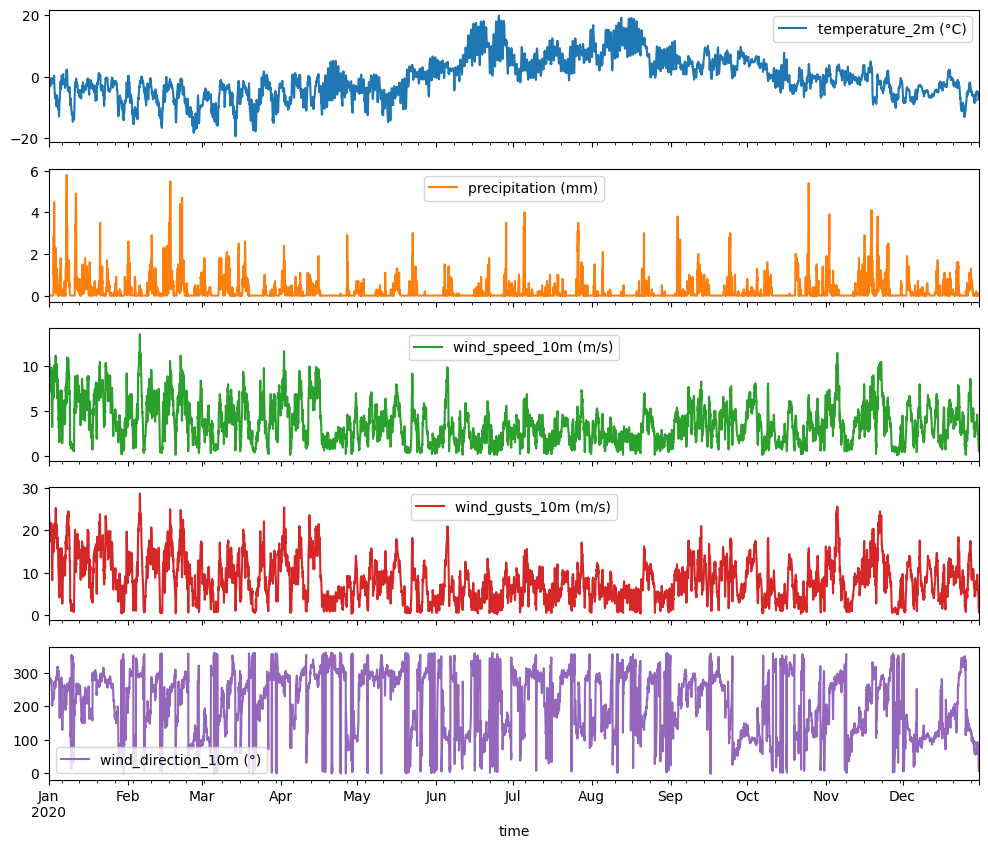

In [9]:
# Convert time column to datetime and set as index
df["time"] = pd.to_datetime(df["time"])
df = df.set_index("time")

df[['temperature_2m (°C)',
    'precipitation (mm)',
    'wind_speed_10m (m/s)',
    'wind_gusts_10m (m/s)',
    'wind_direction_10m (°)']].plot(subplots=True, figsize=(12,10), sharex=True)



In [10]:
# Select numerical columns
df_num = df.select_dtypes(include="number")

# Normalize
df_norm = (df_num - df_num.min()) / (df_num.max() - df_num.min())

# Plot
fig = go.Figure()

for col in df_norm.columns:
    fig.add_trace(go.Scatter(
        x=df_norm.index,
        y=df_norm[col],
        mode='lines',
        name=col
    ))

fig.update_layout(
    title="Weather data (normalized)",
    xaxis_title="Time",
    yaxis_title="Normalized values [0-1]",
    template="plotly_white",
    width=1000,
    height=600
)

fig.show()
